# Éxito en juegos para la tienda online Ice.

Trabajas para la tienda online Ice que vende videojuegos por todo el mundo. Las reseñas de usuarios y expertos, los géneros, las plataformas (por ejemplo, Xbox o PlayStation) y los datos históricos sobre las ventas de juegos están disponibles en fuentes abiertas. Tienes que identificar patrones que determinen si un juego tiene éxito o no. Esto te permitirá detectar proyectos prometedores y planificar campañas publicitarias.

En este proyecto, trataremos de analizar datos de una empresa de una tienda online llamada Ice, que es de videojuegos, trataremos hacer un analisis de los datos prestados en 2016 para ver como se ha comportado la compra de los videojuegos. Ademas, trataremos de analizar hacia que tipo de juegos tiende a haber un mayor exito, o si hay algun patron o algo que podamos utilizar para saber si un juego puede ser prometedores.

Empezaremos presentando los datos, revisandolos y corrigiendo donde se necesite para poder preparar los datos para un correcto analisis de datos.
Ya que los datos esten perfectamente acomodados, limpios, y revisados. Se procedera a hacer varios analisis, graficos visuales, y analisis estadistico.

# Diccionario de datos para el dataframe.

— Name (Nombre)

— Platform (Plataforma)

— Year_of_Release (Año de lanzamiento)

— Genre (Género) 

— NA_sales (ventas en Norteamérica en millones de dólares estadounidenses) 

— EU_sales (ventas en Europa en millones de dólares estadounidenses) 

— JP_sales (ventas en Japón en millones de dólares estadounidenses) 

— Other_sales (ventas en otros países en millones de dólares estadounidenses) 

— Critic_Score (máximo de 100) 

— User_Score (máximo de 10) 

— Rating (ESRB)

# Iniciamos

In [1]:
# Ponemos las librerias que vamos a utilizar

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st



Descargamos la base de datos en el proyecto.

In [2]:
#Cargamos el dataframe de juegos.
games_df=pd.read_csv('./datos_sprint_6/games.csv')
#Mostramos las primeras filas del dataframe y su informacion.
display(games_df.head())
display(games_df.info())

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


None

Una leve descripcion de lo que podemos ver en esta informacion impresa, es que tenemos 11 columnas, empezando por el nombre del videjuego, su plataforma en la que se jugaba, el año de salida del juego, su genero, las ventas en NA, EU, JP y otros, tenemos el valor de critica del juego por el usuario y en general y el rating para ver para que tipo de edades es adecuado el juego.

Podemos ver que hay un total de 16715 filas en el dataframe, vemos que hay varias columnas con datos nulos, vemos tipos de datos incorrectos e incluso vemos strings que podemos mejorar. Tambien tendriamos que buscar datos duplicados, y ver porque hay una gran  cantidad de datos nulos en las ultimas 3 columnas mostradas, que son los valores de la critica y el rating del juego para edades.

# Preparación de los datos.

Procederemos a limpiar y revisar columna por columna, si los datos estan completos, si tiene valores nulos, revisar el porque, ver si sera necesario rellenarlos o no, tambien revisaremos si hay filas duplicadas, revisaremos los tipos de datos que estamos utilizando, y convertiremos todo a mayusculas para hacerlo mas facil de manejar los datos y de buscar duplicaciones. Veremos si es necesario agregar columnas con mayor informacion que nos pueda servir para analizar.

In [3]:
#Volvemos a imprimir las primeras filas del dataframe.
display(games_df.head())


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [4]:
#Empezamos por convertir todas las columnas a minusculas, para evitar problemas en un futuro.
games_df.columns = games_df.columns.str.upper()
#Verificamos que se haya hecho correctamente.
display(games_df.head())

,NAME,PLATFORM,YEAR_OF_RELEASE,GENRE,NA_SALES,EU_SALES,JP_SALES,OTHER_SALES,CRITIC_SCORE,USER_SCORE,RATING
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [5]:
#Convertimos la columna de NAME, PLATFORM, GENRE, y RATING a mayusculas.
games_df['NAME']=games_df['NAME'].str.upper()
games_df['PLATFORM']=games_df['PLATFORM'].str.upper()
games_df['GENRE']=games_df['GENRE'].str.upper()
games_df['RATING']=games_df['RATING'].str.upper()
#Verificamos que se haya hecho correctamente.
display(games_df.head())

,NAME,PLATFORM,YEAR_OF_RELEASE,GENRE,NA_SALES,EU_SALES,JP_SALES,OTHER_SALES,CRITIC_SCORE,USER_SCORE,RATING
0,WII SPORTS,WII,2006.0,SPORTS,41.36,28.96,3.77,8.45,76.0,8,E
1,SUPER MARIO BROS.,NES,1985.0,PLATFORM,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,MARIO KART WII,WII,2008.0,RACING,15.68,12.76,3.79,3.29,82.0,8.3,E
3,WII SPORTS RESORT,WII,2009.0,SPORTS,15.61,10.93,3.28,2.95,80.0,8,E
4,POKEMON RED/POKEMON BLUE,GB,1996.0,ROLE-PLAYING,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [6]:
games_df.info()
#Vemos que hay varias columnas con datos nulos y vemos tipos de datos incorrectos
# Tambien tendriamos que buscar datos duplicados, y ver porque hay una gran cantidad de datos nulos en las ultimas 3 columnas mostradas,
# que son los valores de la critica y el rating del juego para edades.

#Revisamos si hay filas duplicadas.
games_df.duplicated().sum()
#Vemos que no hay filas duplicadas, que eso es bueno, ya que no tendremos que preocuparnos por eso.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   NAME             16713 non-null  object 
 1   PLATFORM         16715 non-null  object 
 2   YEAR_OF_RELEASE  16446 non-null  float64
 3   GENRE            16713 non-null  object 
 4   NA_SALES         16715 non-null  float64
 5   EU_SALES         16715 non-null  float64
 6   JP_SALES         16715 non-null  float64
 7   OTHER_SALES      16715 non-null  float64
 8   CRITIC_SCORE     8137 non-null   float64
 9   USER_SCORE       10014 non-null  object 
 10  RATING           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


np.int64(0)

In [7]:
#Es momento de revisar columna por columna. Empezaremos por la columna NAME, que es el nombre del juego.
#Vemos que hay un par de datos nulos.

display(games_df[games_df['NAME'].isnull()])

#Ya que solo son 2 datos nulos, sin el nombre del juego, de poco servira esta informacion, vemos que la cantidad de ventas en este par de juegos sin nombre
#son muy bajos, por lo que decidimos eliminar estas filas, ya que no aportan nada al analisis.
games_df=games_df.dropna(subset=['NAME'])

#Volvemos a revisar si hay datos nulos en la columna NAME.
games_df.info()
#Vemos que de un total de 16713 filas, ahora tenemos 16713 datos no nulos en la columna de NAME, por lo que esta columana ya no tiene datos nulos.



,NAME,PLATFORM,YEAR_OF_RELEASE,GENRE,NA_SALES,EU_SALES,JP_SALES,OTHER_SALES,CRITIC_SCORE,USER_SCORE,RATING
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   NAME             16713 non-null  object 
 1   PLATFORM         16713 non-null  object 
 2   YEAR_OF_RELEASE  16444 non-null  float64
 3   GENRE            16713 non-null  object 
 4   NA_SALES         16713 non-null  float64
 5   EU_SALES         16713 non-null  float64
 6   JP_SALES         16713 non-null  float64
 7   OTHER_SALES      16713 non-null  float64
 8   CRITIC_SCORE     8137 non-null   float64
 9   USER_SCORE       10014 non-null  object 
 10  RATING           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.5+ MB


In [8]:
#Sin datos nulos, ahora revisamos si hay juegos duplicados en la columna NAME.
games_df['NAME'].duplicated().sum()
#Vemos que hay 5154 juegos duplicados, por lo que tenemos que revisar si son realmente duplicados o si tienen alguna diferencia.
#Para eso, vamos a visualizar los juegos duplicados.
duplicated_games=games_df[games_df['NAME'].duplicated()]
display(duplicated_games)
display(games_df.loc[34:43])


,NAME,PLATFORM,YEAR_OF_RELEASE,GENRE,NA_SALES,EU_SALES,JP_SALES,OTHER_SALES,CRITIC_SCORE,USER_SCORE,RATING
23,GRAND THEFT AUTO V,X360,2013.0,ACTION,9.66,5.14,0.06,1.41,97.0,8.1,M
35,CALL OF DUTY: BLACK OPS II,X360,2012.0,SHOOTER,8.25,4.24,0.07,1.12,83.0,4.8,M
37,CALL OF DUTY: MODERN WARFARE 3,PS3,2011.0,SHOOTER,5.54,5.73,0.49,1.57,88.0,3.2,M
41,CALL OF DUTY: BLACK OPS,PS3,2010.0,SHOOTER,5.99,4.37,0.48,1.79,88.0,6.4,M
42,GRAND THEFT AUTO V,PS4,2014.0,ACTION,3.96,6.31,0.38,1.97,97.0,8.3,M
...,...,...,...,...,...,...,...,...,...,...,...
16706,MEN IN BLACK II: ALIEN ESCAPE,GC,2003.0,SHOOTER,0.01,0.00,0.00,0.00,NaN,tbd,T
16709,SCORE INTERNATIONAL BAJA 1000: THE OFFICIAL GAME,PS2,2008.0,RACING,0.00,0.00,0.00,0.00,NaN,NaN,NaN
16710,SAMURAI WARRIORS: SANADA MARU,PS3,2016.0,ACTION,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,SPIRITS & SPELLS,GBA,2003.0,PLATFORM,0.01,0.00,0.00,0.00,NaN,NaN,NaN


,NAME,PLATFORM,YEAR_OF_RELEASE,GENRE,NA_SALES,EU_SALES,JP_SALES,OTHER_SALES,CRITIC_SCORE,USER_SCORE,RATING
34,CALL OF DUTY: BLACK OPS II,PS3,2012.0,SHOOTER,4.99,5.73,0.65,2.42,83.0,5.3,M
35,CALL OF DUTY: BLACK OPS II,X360,2012.0,SHOOTER,8.25,4.24,0.07,1.12,83.0,4.8,M
36,CALL OF DUTY: MODERN WARFARE 2,X360,2009.0,SHOOTER,8.52,3.59,0.08,1.28,94.0,6.3,M
37,CALL OF DUTY: MODERN WARFARE 3,PS3,2011.0,SHOOTER,5.54,5.73,0.49,1.57,88.0,3.2,M
38,GRAND THEFT AUTO III,PS2,2001.0,ACTION,6.99,4.51,0.30,1.30,97.0,8.5,M
39,SUPER SMASH BROS. BRAWL,WII,2008.0,FIGHTING,6.62,2.55,2.66,1.01,93.0,8.9,T
40,MARIO KART 7,3DS,2011.0,RACING,5.03,4.02,2.69,0.91,85.0,8.2,E
41,CALL OF DUTY: BLACK OPS,PS3,2010.0,SHOOTER,5.99,4.37,0.48,1.79,88.0,6.4,M
42,GRAND THEFT AUTO V,PS4,2014.0,ACTION,3.96,6.31,0.38,1.97,97.0,8.3,M
43,ANIMAL CROSSING: WILD WORLD,DS,2005.0,SIMULATION,2.50,3.45,5.33,0.86,86.0,8.7,E


Aqui visualizando estas dos tablas, podemos ver que los datos que nos salian duplicados en la columna de NAME en realidad no es que esten duplicados es que son de diferentes plataformas, es decir, un juego puede salir para Xbox 360 y para Playstation y tener distintos alores de ventas, esta informacion tambien nos podria servir para las ventas, a fin de cuentas, saber que hay distintas plataformas tambien es un caso de estudio.

In [9]:
#Proseguimos con la columna de year_of_release, que es el año de lanzamiento del juego.
#Vemos que hay varios datos nulos, y que el tipo de dato es float64, por lo que vamos a convertirlo a int64.
games_df['YEAR_OF_RELEASE']=games_df['YEAR_OF_RELEASE'].astype('Int64')
#Volvemos a revisar el tipo de dato.
games_df.info()
#Vemos que ahora el tipo de dato es Int64, y que hay algunos datos nulos, vamos a revisar cuantos son.
games_df['YEAR_OF_RELEASE'].isnull().sum()

<class 'pandas.core.frame.DataFrame'>
Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   NAME             16713 non-null  object 
 1   PLATFORM         16713 non-null  object 
 2   YEAR_OF_RELEASE  16444 non-null  Int64  
 3   GENRE            16713 non-null  object 
 4   NA_SALES         16713 non-null  float64
 5   EU_SALES         16713 non-null  float64
 6   JP_SALES         16713 non-null  float64
 7   OTHER_SALES      16713 non-null  float64
 8   CRITIC_SCORE     8137 non-null   float64
 9   USER_SCORE       10014 non-null  object 
 10  RATING           9949 non-null   object 
dtypes: Int64(1), float64(5), object(5)
memory usage: 2.1+ MB


np.int64(269)

In [10]:
#Vemos que hay 269 datos nulos, vamos a revisar que juegos son.
year_null_df=games_df[games_df['YEAR_OF_RELEASE'].isnull()]
display(year_null_df.head(20))



,NAME,PLATFORM,YEAR_OF_RELEASE,GENRE,NA_SALES,EU_SALES,JP_SALES,OTHER_SALES,CRITIC_SCORE,USER_SCORE,RATING
183,MADDEN NFL 2004,PS2,<NA>,SPORTS,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA SOCCER 2004,PS2,<NA>,SPORTS,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO BATMAN: THE VIDEOGAME,WII,<NA>,ACTION,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,WWE SMACKDOWN VS. RAW 2006,PS2,<NA>,FIGHTING,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,SPACE INVADERS,2600,<NA>,SHOOTER,2.36,0.14,0.00,0.03,NaN,NaN,NaN
627,ROCK BAND,X360,<NA>,MISC,1.93,0.33,0.00,0.21,92.0,8.2,T
657,FROGGER'S ADVENTURES: TEMPLE OF THE FROG,GBA,<NA>,ADVENTURE,2.15,0.18,0.00,0.07,73.0,tbd,E
678,LEGO INDIANA JONES: THE ORIGINAL ADVENTURES,WII,<NA>,ACTION,1.51,0.61,0.00,0.21,78.0,6.6,E10+
719,CALL OF DUTY 3,WII,<NA>,SHOOTER,1.17,0.84,0.00,0.23,69.0,6.7,T
805,ROCK BAND,WII,<NA>,MISC,1.33,0.56,0.00,0.20,80.0,6.3,T


Vemos que hay 269 datos nulos en la fila de year of release, y al mostrar algunos, podemos darnos cuenta de que la mayoria de estos juegos son bastante viejos,y con muy pocas ganancias. Tambien podemos ver que hay algunos juegos que en el titulo del juego ya viene el año en que salieron, pero son muhcos de 2004, 2006, ya hace mas de 15 años. Me gustaria revisar estos datos, viendo sus ventas totales, para ver si estos datos, realmente aportan algo en cantidad de dinero o no. Asi que lo primero que hare sera agregar una nueva columna que tenga el total de ventas en na,eu,jp y otros.



In [11]:
#Agregamos la nueva columana de ventas totales, que sera la suma de las ventas en NA, EU, JP y otros.
games_df['TOTAL_SALES']=games_df['NA_SALES']+games_df['EU_SALES']+games_df['JP_SALES']+games_df['OTHER_SALES']
#Volvemos a revisar la informacion del dataframe.
display(games_df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 16713 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   NAME             16713 non-null  object 
 1   PLATFORM         16713 non-null  object 
 2   YEAR_OF_RELEASE  16444 non-null  Int64  
 3   GENRE            16713 non-null  object 
 4   NA_SALES         16713 non-null  float64
 5   EU_SALES         16713 non-null  float64
 6   JP_SALES         16713 non-null  float64
 7   OTHER_SALES      16713 non-null  float64
 8   CRITIC_SCORE     8137 non-null   float64
 9   USER_SCORE       10014 non-null  object 
 10  RATING           9949 non-null   object 
 11  TOTAL_SALES      16713 non-null  float64
dtypes: Int64(1), float64(6), object(5)
memory usage: 2.2+ MB


None

In [12]:
#volvemos a ver las primeras filas del dataframe de valores ausentes en year of release con sus total sales.
year_null_df=games_df[games_df['YEAR_OF_RELEASE'].isnull()]
display(year_null_df.head())
#Hay que contar cuantas filas hay con total sales menores a 2.5 millones.
#Contamos cuantas filas hay con total sales menores a 2.5 millones.
low_sales=year_null_df[year_null_df['TOTAL_SALES']<2.5]
display(low_sales)


,NAME,PLATFORM,YEAR_OF_RELEASE,GENRE,NA_SALES,EU_SALES,JP_SALES,OTHER_SALES,CRITIC_SCORE,USER_SCORE,RATING,TOTAL_SALES
183,MADDEN NFL 2004,PS2,<NA>,SPORTS,4.26,0.26,0.01,0.71,94.0,8.5,E,5.24
377,FIFA SOCCER 2004,PS2,<NA>,SPORTS,0.59,2.36,0.04,0.51,84.0,6.4,E,3.50
456,LEGO BATMAN: THE VIDEOGAME,WII,<NA>,ACTION,1.80,0.97,0.00,0.29,74.0,7.9,E10+,3.06
475,WWE SMACKDOWN VS. RAW 2006,PS2,<NA>,FIGHTING,1.57,1.02,0.00,0.41,NaN,NaN,NaN,3.00
609,SPACE INVADERS,2600,<NA>,SHOOTER,2.36,0.14,0.00,0.03,NaN,NaN,NaN,2.53


,NAME,PLATFORM,YEAR_OF_RELEASE,GENRE,NA_SALES,EU_SALES,JP_SALES,OTHER_SALES,CRITIC_SCORE,USER_SCORE,RATING,TOTAL_SALES
627,ROCK BAND,X360,<NA>,MISC,1.93,0.33,0.0,0.21,92.0,8.2,T,2.47
657,FROGGER'S ADVENTURES: TEMPLE OF THE FROG,GBA,<NA>,ADVENTURE,2.15,0.18,0.0,0.07,73.0,tbd,E,2.40
678,LEGO INDIANA JONES: THE ORIGINAL ADVENTURES,WII,<NA>,ACTION,1.51,0.61,0.0,0.21,78.0,6.6,E10+,2.33
719,CALL OF DUTY 3,WII,<NA>,SHOOTER,1.17,0.84,0.0,0.23,69.0,6.7,T,2.24
805,ROCK BAND,WII,<NA>,MISC,1.33,0.56,0.0,0.20,80.0,6.3,T,2.09
...,...,...,...,...,...,...,...,...,...,...,...,...
16373,PDC WORLD CHAMPIONSHIP DARTS 2008,PSP,<NA>,SPORTS,0.01,0.00,0.0,0.00,43.0,tbd,E10+,0.01
16405,FREAKY FLYERS,GC,<NA>,RACING,0.01,0.00,0.0,0.00,69.0,6.5,T,0.01
16448,INVERSION,PC,<NA>,SHOOTER,0.01,0.00,0.0,0.00,59.0,6.7,M,0.01
16458,HAKUOUKI: SHINSENGUMI KITAN,PS3,<NA>,ADVENTURE,0.01,0.00,0.0,0.00,NaN,NaN,NaN,0.01


En este caso vemos que hay 264 filas con ventas totales menores a 2.5 millones de dolares de 269 que no tienen el year of release. En este caso podemos ver que estas 264 filas, son juegos muy viejos y con muy pocas ventas. Ahora revisaremos los juegos con mayor ventas, para ver que tanto vendieron los otros 5 juegos.


In [13]:
low_sales=year_null_df[year_null_df['TOTAL_SALES']>2.5]
display(low_sales)
#En este caso vemos que son muy pocos juegos, y que son juegos muy viejos, por lo que podemos asumir que no aportan mucho al analisis.


,NAME,PLATFORM,YEAR_OF_RELEASE,GENRE,NA_SALES,EU_SALES,JP_SALES,OTHER_SALES,CRITIC_SCORE,USER_SCORE,RATING,TOTAL_SALES
183,MADDEN NFL 2004,PS2,<NA>,SPORTS,4.26,0.26,0.01,0.71,94.0,8.5,E,5.24
377,FIFA SOCCER 2004,PS2,<NA>,SPORTS,0.59,2.36,0.04,0.51,84.0,6.4,E,3.50
456,LEGO BATMAN: THE VIDEOGAME,WII,<NA>,ACTION,1.80,0.97,0.00,0.29,74.0,7.9,E10+,3.06
475,WWE SMACKDOWN VS. RAW 2006,PS2,<NA>,FIGHTING,1.57,1.02,0.00,0.41,NaN,NaN,NaN,3.00
609,SPACE INVADERS,2600,<NA>,SHOOTER,2.36,0.14,0.00,0.03,NaN,NaN,NaN,2.53


Ya que revisamos las 269 filas nulas en el año de salida, vemos que son juegos muy viejos, en consolas bastante viejas, vemos que las ventas son muy bajas, y que son pocos datos, apenas el 1.6% de los datos. Eliminamos todos estos datos sabiendo que todos estos en su totalidad son juegos viejos y con pocas ganancias.  

In [14]:
#Eliminamos las filas con year of release nulo.
games_df=games_df.dropna(subset=['YEAR_OF_RELEASE'])
games_df.info()
games_df.head()

<class 'pandas.core.frame.DataFrame'>
Index: 16444 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   NAME             16444 non-null  object 
 1   PLATFORM         16444 non-null  object 
 2   YEAR_OF_RELEASE  16444 non-null  Int64  
 3   GENRE            16444 non-null  object 
 4   NA_SALES         16444 non-null  float64
 5   EU_SALES         16444 non-null  float64
 6   JP_SALES         16444 non-null  float64
 7   OTHER_SALES      16444 non-null  float64
 8   CRITIC_SCORE     7983 non-null   float64
 9   USER_SCORE       9839 non-null   object 
 10  RATING           9768 non-null   object 
 11  TOTAL_SALES      16444 non-null  float64
dtypes: Int64(1), float64(6), object(5)
memory usage: 1.6+ MB


,NAME,PLATFORM,YEAR_OF_RELEASE,GENRE,NA_SALES,EU_SALES,JP_SALES,OTHER_SALES,CRITIC_SCORE,USER_SCORE,RATING,TOTAL_SALES
0,WII SPORTS,WII,2006,SPORTS,41.36,28.96,3.77,8.45,76.0,8,E,82.54
1,SUPER MARIO BROS.,NES,1985,PLATFORM,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,MARIO KART WII,WII,2008,RACING,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,WII SPORTS RESORT,WII,2009,SPORTS,15.61,10.93,3.28,2.95,80.0,8,E,32.77
4,POKEMON RED/POKEMON BLUE,GB,1996,ROLE-PLAYING,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38


Ya nos quedan 3 columnas por revisar, estas son la de critic_score, user_score y rating. Vemos que en estas columnas si son muchisimos datos nulos, lo que significa que no podemos simplemente eliminarlas ya que si son muchisimos datos que perderiamos. Tambien vemos que en user_score el tipo de dato es de object, lo que es bastante raro ya que deberia de ser un numero fijo. Lo mismo para critic_score, vemos que en este caso es un float64 y deberias de saber si vamos a tomar los valores de user_score y critic_score como integer o como float. Ya que el valor de critic score vemos que va de 0 a 100 y el valor de user score va de 0 a 10.

El siguiente paso que me gustaria realizar es cambiar los valores de critic score y user score a integers en valores de 1 a 100.

In [15]:
#Primero revisamos los valores unicos en user_score y critic_score.
display(games_df['USER_SCORE'].unique())
#Vemos que hay un valor llamado tbd, que significa 'to be determined', que significa que el juego no ha sido lanzado 
# o que no se ha determinado el puntaje del usuario en ese momento.
#Vamos a revisar cuantos son.
tbd_count= games_df[games_df['USER_SCORE']=='tbd']
tbd_count.shape
#Vemos que hay 2376 juegos con el valor de tbd. Pero como me gustaria cambiar esta columna a un valor numerico, vamos a cambiar este valor a nulo.
games_df['USER_SCORE']=games_df['USER_SCORE'].replace('tbd', np.nan)
#Volvemos a revisar los valores nulos.
games_df.info()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

<class 'pandas.core.frame.DataFrame'>
Index: 16444 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   NAME             16444 non-null  object 
 1   PLATFORM         16444 non-null  object 
 2   YEAR_OF_RELEASE  16444 non-null  Int64  
 3   GENRE            16444 non-null  object 
 4   NA_SALES         16444 non-null  float64
 5   EU_SALES         16444 non-null  float64
 6   JP_SALES         16444 non-null  float64
 7   OTHER_SALES      16444 non-null  float64
 8   CRITIC_SCORE     7983 non-null   float64
 9   USER_SCORE       7463 non-null   object 
 10  RATING           9768 non-null   object 
 11  TOTAL_SALES      16444 non-null  float64
dtypes: Int64(1), float64(6), object(5)
memory usage: 1.6+ MB


In [16]:
#Ahora ya podemos convertir la columna de user score a integer multiplicando todos los valores por 10 primero.
games_df['USER_SCORE']=games_df['USER_SCORE'].astype(float)*10
games_df.head()
#Ahora convertimos los valores de critic score y user score a integer.
games_df['CRITIC_SCORE']=games_df['CRITIC_SCORE'].astype('Int64')
games_df['USER_SCORE']=games_df['USER_SCORE'].astype('Int64')
#Volvemos a revisar la informacion del dataframe.
display(games_df.info())
games_df.head()

<class 'pandas.core.frame.DataFrame'>
Index: 16444 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   NAME             16444 non-null  object 
 1   PLATFORM         16444 non-null  object 
 2   YEAR_OF_RELEASE  16444 non-null  Int64  
 3   GENRE            16444 non-null  object 
 4   NA_SALES         16444 non-null  float64
 5   EU_SALES         16444 non-null  float64
 6   JP_SALES         16444 non-null  float64
 7   OTHER_SALES      16444 non-null  float64
 8   CRITIC_SCORE     7983 non-null   Int64  
 9   USER_SCORE       7463 non-null   Int64  
 10  RATING           9768 non-null   object 
 11  TOTAL_SALES      16444 non-null  float64
dtypes: Int64(3), float64(5), object(4)
memory usage: 1.7+ MB


None

,NAME,PLATFORM,YEAR_OF_RELEASE,GENRE,NA_SALES,EU_SALES,JP_SALES,OTHER_SALES,CRITIC_SCORE,USER_SCORE,RATING,TOTAL_SALES
0,WII SPORTS,WII,2006,SPORTS,41.36,28.96,3.77,8.45,76,80,E,82.54
1,SUPER MARIO BROS.,NES,1985,PLATFORM,29.08,3.58,6.81,0.77,<NA>,<NA>,NaN,40.24
2,MARIO KART WII,WII,2008,RACING,15.68,12.76,3.79,3.29,82,83,E,35.52
3,WII SPORTS RESORT,WII,2009,SPORTS,15.61,10.93,3.28,2.95,80,80,E,32.77
4,POKEMON RED/POKEMON BLUE,GB,1996,ROLE-PLAYING,11.27,8.89,10.22,1.00,<NA>,<NA>,NaN,31.38


Finalmente Vemos que los datos nulos en critic score y user score, los dejaremos de esa forma, para no afectar los analisis estadisticos lo dejaremos de esta forma. Y la columna de Rating tambien la dejaremos de esa forma, ya que todavia no tengo ninguna idea de como la vamos a utilizar en nuestros analisis.

Asi que de esta forma terminamos con la limpieza y preparacion de los datos.


# Empezamos a analizar algunos datos.
Mira cuántos juegos fueron lanzados en diferentes años. ¿Son significativos los datos de cada período?

Observa cómo varían las ventas de una plataforma a otra. Elige las plataformas con las mayores ventas totales y construye una distribución basada en los datos de cada año. Busca las plataformas que solían ser populares pero que ahora no tienen ventas. ¿Cuánto tardan generalmente las nuevas plataformas en aparecer y las antiguas en desaparecer?

Determina para qué período debes tomar datos. Para hacerlo mira tus respuestas a las preguntas anteriores. Los datos deberían permitirte construir un modelo para 2017.


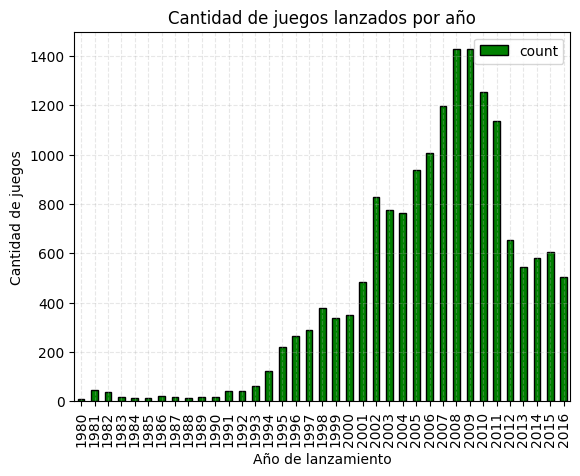

In [17]:
#Respondemos la primera pregunta del analisis.
#Cuantos juegos fueron lanzados en diferentes años
games_per_year = games_df['YEAR_OF_RELEASE'].value_counts().sort_index().reset_index()
#Graficamos los juegos por año en un histograma.
games_per_year.plot(kind='bar',x='YEAR_OF_RELEASE',y='count',color='green', edgecolor='black')
plt.grid(alpha=0.3,linestyle='--')
plt.title('Cantidad de juegos lanzados por año')
plt.xlabel('Año de lanzamiento')
plt.ylabel('Cantidad de juegos')
plt.show()


### Mira cuántos juegos fueron lanzados en diferentes años. ¿Son significativos los datos de cada período?


En esta grafica podemos ver como la grafica esta sesgada hacia la izquierda, es decir que los datos no estan centrados, los datos que estan dentro del marco de 1980 a 1990 son realmente muy poquitos. Los datos que tenemos a partir de 1991 son muchos mas, lo que hace que nos haga pensar que los datos a partir de 1991 son mucho mas significativos que los años de 1980 a 1990.

Definitivamente no todos los años son significativos en esta grafica. Ya que al principio no habian tantos juegos y despues de 1990 empezo a crecer la grafica de videojuegos.

##### Observa cómo varían las ventas de una plataforma a otra. Elige las plataformas con las mayores ventas totales y construye una distribución basada en los datos de cada año. Busca las plataformas que solían ser populares pero que ahora no tienen ventas. ¿Cuánto tardan generalmente las nuevas plataformas en aparecer y las antiguas en desaparecer?

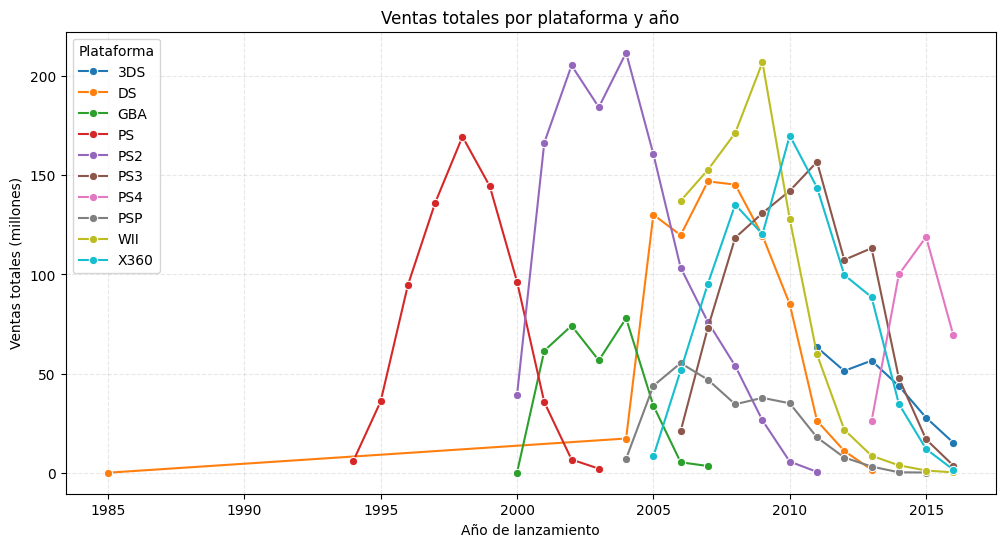

In [18]:
#Buscaremos la forma de graficar las plataformas con mayores ventas totales y una distribucion basada en los datos de cada año.
platform_sales=games_df.groupby(['PLATFORM','YEAR_OF_RELEASE'])['TOTAL_SALES'].sum().reset_index().sort_index()
#display(platform_sales)
top_platforms= platform_sales.groupby('PLATFORM')['TOTAL_SALES'].sum().reset_index().sort_values(by='TOTAL_SALES', ascending=False)
#display(top_platforms.head(10))
top_platform_sales= platform_sales[platform_sales['PLATFORM'].isin(top_platforms['PLATFORM'].head(10))]

#display(platform_sales[platform_sales['PLATFORM']=='DS']) 

plt.figure(figsize=(12,6))
sns.lineplot(data=top_platform_sales,x='YEAR_OF_RELEASE',y='TOTAL_SALES',hue='PLATFORM',marker='o')
plt.title('Ventas totales por plataforma y año')
plt.xlabel('Año de lanzamiento')
plt.ylabel('Ventas totales (millones)')
plt.legend(title='Plataforma')
plt.grid(alpha=0.3, linestyle='--')
plt.show()



Aqui nos podemos dar cuenta de que hay algo mal en nuestra grafica, o por lo menos con la linea del DS, esta muy raro que salga desde 1985 asi que revisaremos eso y volveremos a graficar corrigiendo ese dato.

,NAME,PLATFORM,YEAR_OF_RELEASE,GENRE,NA_SALES,EU_SALES,JP_SALES,OTHER_SALES,CRITIC_SCORE,USER_SCORE,RATING,TOTAL_SALES
15957,STRONGEST TOKYO UNIVERSITY SHOGI DS,DS,1985,ACTION,0.0,0.0,0.02,0.0,<NA>,<NA>,NaN,0.02


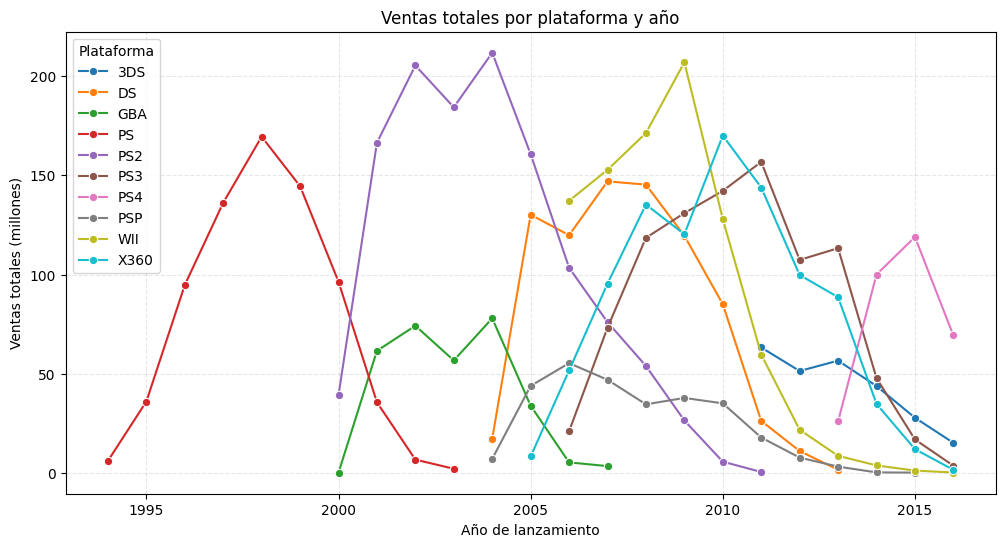

In [19]:
#Buscamos en el dataframe completo el valor de la plataforma DS del a;o 1985
ds_1985 = games_df[(games_df['PLATFORM'] == 'DS') & (games_df['YEAR_OF_RELEASE'] == 1985)]
display(ds_1985)
#Aqui honestamente no se que paso, ya que la plataforma DS salio en 2004, por lo que no deberia de haber datos de esa plataforma en 1985.
#Asi que tenemos dos opciones, investigar cuando salio y cambiar la fecha o eliminar el dato, en internet me aparece que el juego salio en 2007.
#Asi que vamos a cambiar el valor de year of release a 2007.
games_df.loc[(games_df['PLATFORM'] == 'DS') & (games_df['YEAR_OF_RELEASE'] == 1985), 'YEAR_OF_RELEASE'] = 2007
#Volvemos a graficar copiando el recuadro de arriba.

#Buscaremos la forma de graficar las plataformas con mayores ventas totales y una distribucion basada en los datos de cada año.
platform_sales=games_df.groupby(['PLATFORM','YEAR_OF_RELEASE'])['TOTAL_SALES'].sum().reset_index().sort_index()
#display(platform_sales)
top_platforms= platform_sales.groupby('PLATFORM')['TOTAL_SALES'].sum().reset_index().sort_values(by='TOTAL_SALES', ascending=False)
#display(top_platforms.head(10))
top_platform_sales= platform_sales[platform_sales['PLATFORM'].isin(top_platforms['PLATFORM'].head(10))]

#display(platform_sales[platform_sales['PLATFORM']=='DS']) 

plt.figure(figsize=(12,6))
sns.lineplot(data=top_platform_sales,x='YEAR_OF_RELEASE',y='TOTAL_SALES',hue='PLATFORM',marker='o')
plt.title('Ventas totales por plataforma y año')
plt.xlabel('Año de lanzamiento')
plt.ylabel('Ventas totales (millones)')
plt.legend(title='Plataforma')
plt.grid(alpha=0.3, linestyle='--')
plt.show()


Respondiendo a la pregunta.

Observa cómo varían las ventas de una plataforma a otra. Elige las plataformas con las mayores ventas totales y construye una distribución basada en los datos de cada año. Busca las plataformas que solían ser populares pero que ahora no tienen ventas. ¿Cuánto tardan generalmente las nuevas plataformas en aparecer y las antiguas en desaparecer?

Nos damos cuenta de que la PS que vendria siendo la PlayStation 1, fue la primera consola con mayor cantidad de ventas teniendo su pico en 1998, esta empezo en 1994 y terminaron las ventas en 2003. Lo que nos da un aproximado de 10 años de venta. La PS2 que era la segunda consola salio en el año 2000 junto con GBA y para 2001 la PS2 habia lelgado al maximo de la primer PS, mientras que la competencia apenas llego a 1/3 de lo que llego la PS2.La PS2 salio de circulacion por el año 2011. Siguiendo con la teoria de los 10 años de consumo. Lo mismo para la PS3 de 2006 a 2016 aproximadamente hasta la fecha(los datos llegan hasta 2016).

Pero si nos enfocamos en otras consolas que no tuvieron tanto exito, aunque a fin de cuentas estan en el top 10 de consolas con mayores ventas. Las consolas con menores ventas como el GBA tuvo una duracion de como 7 años, siendo de las menores. Sin embargo las demas consolas que tuvieron un exito notable se puede ver que tuvieron un exito de aproximadamente 10 años como media.
Finalmente, podemos darnos cuenta que despues de la PlayStation 1, la 2 salio 6 años despues, lo mismo para la 3, para la 4 salio 7 años despues de la 3, esto marcando un promedio de años de 6 años, para la continuidad de consolas, dando un par de años antes y despues de la consola de ventas a consolas viejas o nuevas mientras estan las otras, algo muy comun hoy en dia que mucha gente realmente espera a que salga la nueva consola, para poder comprar la vieja(mas barato).


##### Determina para qué período debes tomar datos. Para hacerlo mira tus respuestas a las preguntas anteriores. Los datos deberían permitirte construir un modelo para 2017.

Esta pregunta no necesita que grafiquemos nada, la realidad es que con las graficas anteriores ya se nos muestra que los datos anteriores a 1995 son muy pequeños, podriamos tomar los datos hasta 1991, como se menciono anteriormente en la grafica de barras. Pero realmente los datos importantes vendrian siendo a partir de 1995. Para manejar datos coherentes con la actualidad y poder hacer modelos predictivos para el año 2017.

Trabajaremos solo con los datos de a partir de 1995 de ahora en adelante.

¿Qué plataformas son líderes en ventas? ¿Cuáles crecen y cuáles se reducen? Elige varias plataformas potencialmente rentables.

Crea un diagrama de caja para las ventas globales de todos los juegos, desglosados por plataforma. ¿Son significativas las diferencias en las ventas? ¿Qué sucede con las ventas promedio en varias plataformas? Describe tus hallazgos.


In [20]:
#Primero, vamos a hace un nuevo data frame con los datos solamente de 1995 en adelante.
games_df_1995=games_df[games_df['YEAR_OF_RELEASE']>=1995]
games_df_1995.info()
#Tomando solamente estos datos, proseguiremos con el resto del analisis.

<class 'pandas.core.frame.DataFrame'>
Index: 15959 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   NAME             15959 non-null  object 
 1   PLATFORM         15959 non-null  object 
 2   YEAR_OF_RELEASE  15959 non-null  Int64  
 3   GENRE            15959 non-null  object 
 4   NA_SALES         15959 non-null  float64
 5   EU_SALES         15959 non-null  float64
 6   JP_SALES         15959 non-null  float64
 7   OTHER_SALES      15959 non-null  float64
 8   CRITIC_SCORE     7979 non-null   Int64  
 9   USER_SCORE       7459 non-null   Int64  
 10  RATING           9763 non-null   object 
 11  TOTAL_SALES      15959 non-null  float64
dtypes: Int64(3), float64(5), object(4)
memory usage: 1.6+ MB


In [21]:
#¿Qué plataformas son líderes en ventas? ¿Cuáles crecen y cuáles se reducen? Elige varias plataformas potencialmente rentables.
#Vamos a ver las plataformas con mayores ventas totales.
platform_sales=games_df_1995.groupby('PLATFORM')['TOTAL_SALES'].sum().reset_index().sort_values(by='TOTAL_SALES', ascending=False)
display(platform_sales.head(10))

,PLATFORM,TOTAL_SALES
12,PS2,1233.56
23,X360,961.24
13,PS3,931.34
20,WII,891.18
3,DS,802.78
11,PS,721.55
14,PS4,314.14
5,GBA,312.88
15,PSP,289.53
1,3DS,257.81


Respondiendo la pregunta planteada, vemos que las plataformas que fueron lideres en ventas fueron los playstation, y cuando el Xbox360 llego, las ventas empezaron a dividirse entre estas consolas, entre los playstation y los Xbox360, luego finalmente llego el WII y tambien rompio ventas en su primer año. 

En mi punto de vista podemos ver que las plataformas potenciales son precisamente el top6, en el top 6 de consolas vemos 3 consolas playstation, la 1, 2 y la 3(son las que tenemos datos completos de esta consola, la 4 sigue en circulacion).

Asi que de cierta forma, las playstation son lideres en ventas por excelencia, y luego llego xbox360 y la wii para competir.

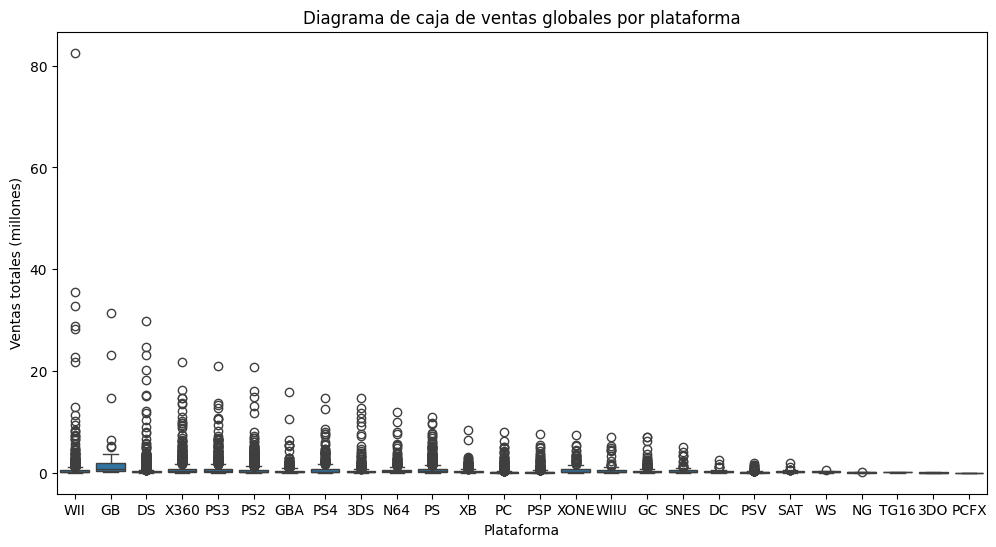

In [22]:
#Crea un diagrama de caja para las ventas globales de todos los juegos, desglosados por plataforma. 
# ¿Son significativas las diferencias en las ventas? ¿Qué sucede con las ventas promedio en varias plataformas? Describe tus hallazgos.
plt.figure(figsize=(12,6))
sns.boxplot(data=games_df_1995, x='PLATFORM', y='TOTAL_SALES')
plt.title('Diagrama de caja de ventas globales por plataforma')
plt.xlabel('Plataforma')
plt.ylabel('Ventas totales (millones)')
plt.show()



In [23]:
games_df_1995.groupby('PLATFORM')['TOTAL_SALES'].mean().sort_values(ascending=False)

PLATFORM
GB      2.185938
PS4     0.801378
X360    0.780227
PS3     0.713124
WII     0.692986
N64     0.689905
XONE    0.645020
PS      0.615132
PS2     0.579953
WIIU    0.559116
SNES    0.544945
3DS     0.503535
GBA     0.385795
DS      0.378491
GC      0.362970
XB      0.313288
DC      0.306731
PC      0.254015
PSP     0.242691
WS      0.236667
SAT     0.194416
PSV     0.125431
TG16    0.080000
NG      0.071667
3DO     0.040000
PCFX    0.030000
Name: TOTAL_SALES, dtype: float64

 ¿Son significativas las diferencias en las ventas? ¿Qué sucede con las ventas promedio en varias plataformas? Describe tus hallazgos.

 Son muy significativas las diferencias en las ventas entre las consolas, lo mismo para las medias. Vemos que la consola GB tiene unas medias muy altas, esto debido a que fueron poquitos años y poquitos juegos los que salieron, sin embargo la media de GB es mayor a cualquier otra. Tambien vemos grandes diferencias entre las consolas mas nuevas y las mas viejas, sin incluir a la GB. Vemos como entre mas nueva es la consola mayor promedio de ventas tiene.

 Las ventas promedio en varias plataformas son muy bajas, esto es porque hay muchisimos juegos con bajas ganancias y pocas con altas. Lo que ensucia las medias de ventas en las consolas.

Mira cómo las reseñas de usuarios y profesionales afectan las ventas de una plataforma popular (tu elección). Crea un gráfico de dispersión y calcula la correlación entre las reseñas y las ventas. Saca conclusiones.

<class 'pandas.core.frame.DataFrame'>
Index: 775 entries, 16 to 16230
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   TOTAL_SALES   775 non-null    float64
 1   CRITIC_SCORE  775 non-null    Int64  
 2   USER_SCORE    775 non-null    Int64  
dtypes: Int64(2), float64(1)
memory usage: 25.7 KB


None

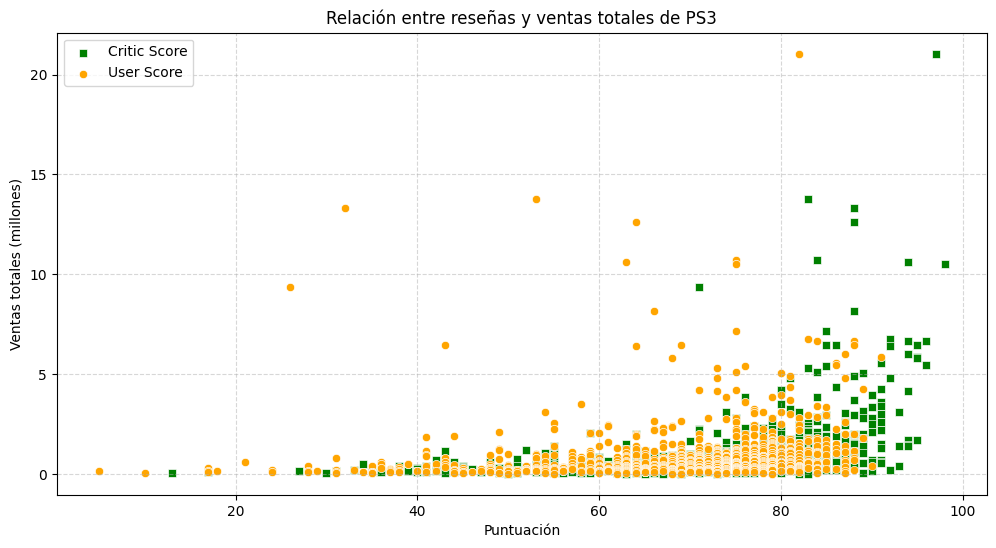

In [24]:
#Miraremos como las reseñas de los usuarios y profesionales afectan a las ventas de la plataforma PS3. 
ps3_df = games_df_1995[games_df_1995['PLATFORM'] == 'PS3']
#Tomaremos solamente las columnas de ventas totales, critic score y user score.
ps3_df = ps3_df[['TOTAL_SALES', 'CRITIC_SCORE', 'USER_SCORE']]
#Eliminamos las filas con valores nulos.
ps3_df = ps3_df.dropna()
#Volvemos a revisar la informacion del dataframe.
display(ps3_df.info())
#Creamos un grafico de dispersión entre las reseñas de los críticos y las ventas totales.
plt.figure(figsize=(12, 6))
sns.scatterplot(data=ps3_df, x='CRITIC_SCORE', y='TOTAL_SALES', color='green', label='Critic Score',marker='s')
sns.scatterplot(data=ps3_df, x='USER_SCORE', y='TOTAL_SALES', color='orange', label='User Score')
plt.title('Relación entre reseñas y ventas totales de PS3')
plt.xlabel('Puntuación')
plt.ylabel('Ventas totales (millones)')
plt.legend()
plt.grid(alpha=0.5, linestyle='--')
plt.show()

Con esta grafica de dispersion podemos darnos cuenta de que si hay una correlacion a simlpe vista aunque sea muy debil, entre la cantidad de ventas y sus calificaciones profesionales y del usuario.
Vemos que entre mayor calificacion tiene mayor cantidad de ventas va habiendo en promedio, si quitamos unos que otros datos anormales o extremos, podemos darnos cuenta del incremento que hay.

Ademas, parece ser que hay menos correlacion entre la calificacion del usuario y sus ventas que ocn el de la critica. 

In [25]:
#Calculamos la correlación entre las reseñas de los críticos y las ventas totales.
critic_corr = ps3_df['CRITIC_SCORE'].corr(ps3_df['TOTAL_SALES'])
user_corr = ps3_df['USER_SCORE'].corr(ps3_df['TOTAL_SALES'])
print(f'Correlación entre Critic Score y Total Sales: {critic_corr:.2f}')
print(f'Correlación entre User Score y Total Sales: {user_corr:.2f}')

Correlación entre Critic Score y Total Sales: 0.43
Correlación entre User Score y Total Sales: 0.14


Teniendo en cuenta tus conclusiones compara las ventas de los mismos juegos en otras plataformas.

Echa un vistazo a la distribución general de los juegos por género. ¿Qué se puede decir de los géneros más rentables? ¿Puedes generalizar acerca de los géneros con ventas altas y bajas?

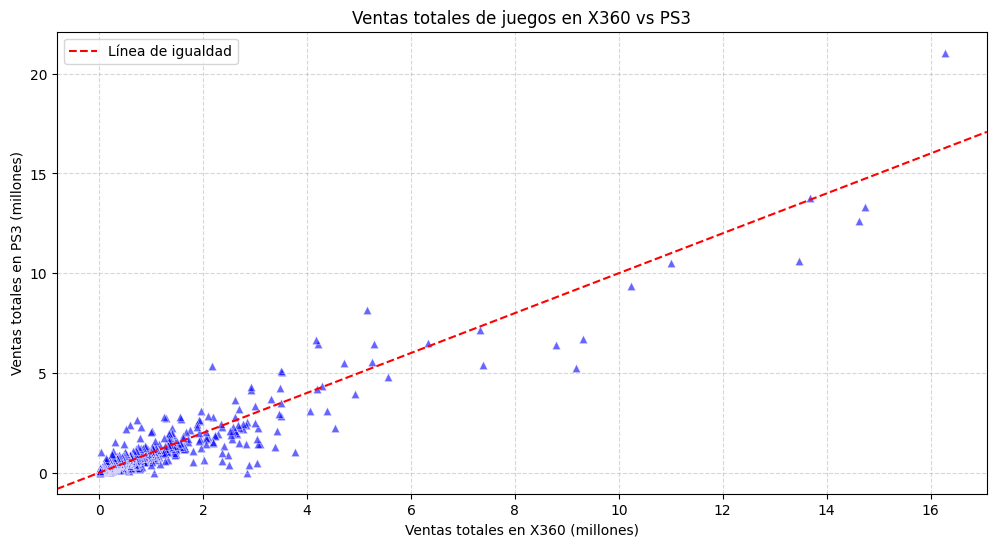

In [26]:
#Comparamos las ventas de los mismos juegos en otras plataformas por ejemplo en X360.
x360_df=games_df_1995[games_df_1995['PLATFORM'] == 'X360']
ps3_df=games_df_1995[games_df_1995['PLATFORM'] == 'PS3']
#Vamos a hace un dataframe con los juegos que estan en ambas plataformas.
juegos_en_comun = pd.merge(x360_df, ps3_df, on='NAME', suffixes=('_X360', '_PS3'))
#Mostramos los primeros 10 juegos en comun.
#display(juegos_en_comun.head(10))
#Ahora solo vamos a tomar las columnas de ventas totales y sus criticas.
juegos_en_comun = juegos_en_comun[['NAME', 'TOTAL_SALES_X360', 'TOTAL_SALES_PS3', 'CRITIC_SCORE_X360', 'CRITIC_SCORE_PS3', 'USER_SCORE_X360', 'USER_SCORE_PS3']]
#Mostramos el df.
#display(juegos_en_comun)

#Ahora vamos a graficar las ventas totales de los juegos en ambas plataformas.
plt.figure(figsize=(12, 6))
sns.scatterplot(data=juegos_en_comun, x='TOTAL_SALES_X360', y='TOTAL_SALES_PS3', color='blue', marker='^',alpha=0.6)
plt.title('Ventas totales de juegos en X360 vs PS3')
plt.xlabel('Ventas totales en X360 (millones)')
plt.ylabel('Ventas totales en PS3 (millones)')
plt.grid(alpha=0.5, linestyle='--')
plt.axline((0, 0), slope=1, color='red', linestyle='--', label='Línea de igualdad')
plt.legend()
plt.show()




In [27]:
#Calculamos la correlación entre las ventas totales en ambas plataformas.
x360_corr = juegos_en_comun['TOTAL_SALES_X360'].corr(juegos_en_comun['TOTAL_SALES_PS3'])

print(f'Correlación entre ventas en X360 y PS3: {x360_corr:.2f}')


Correlación entre ventas en X360 y PS3: 0.94


Esto nos da a entender que las ventas en una consola u otra, realmente si tienen mucha correlacion, a fin de cuenta es el mismo juego, solo que en diferente consola, supongo que se podria tomar en consideracion es que tomamos las 2 mejores consolas que habian en ese momento. La PS3 y el X360 eran grandes competencias, y las mejores del mercado.

Echando un vistazo a la distribución general de los juegos por género. ¿Qué se puede decir de los géneros más rentables? ¿Puedes generalizar acerca de los géneros con ventas altas y bajas?

In [28]:
#Vamos a ver si hay una correlacion entre los generos de los juegos y sus ventas totales.
#Creamos un dataframe con los generos y sus ventas totales.
genre_sales=games_df_1995.groupby('GENRE')['TOTAL_SALES'].sum().reset_index().sort_values(by='TOTAL_SALES', ascending=False)
#Mostramos el dataframe.
display(genre_sales)

,GENRE,TOTAL_SALES
0,ACTION,1645.09
10,SPORTS,1258.33
8,SHOOTER,967.94
7,ROLE-PLAYING,888.47
3,MISC,773.67
6,RACING,692.41
4,PLATFORM,611.83
2,FIGHTING,402.57
9,SIMULATION,379.12
1,ADVENTURE,210.25


/var/folders/52/1m6xdwc12jq950g_76bq1l140000gn/T/ipykernel_10596/2505577162.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=genre_sales, x='GENRE', y='TOTAL_SALES', palette='dark')


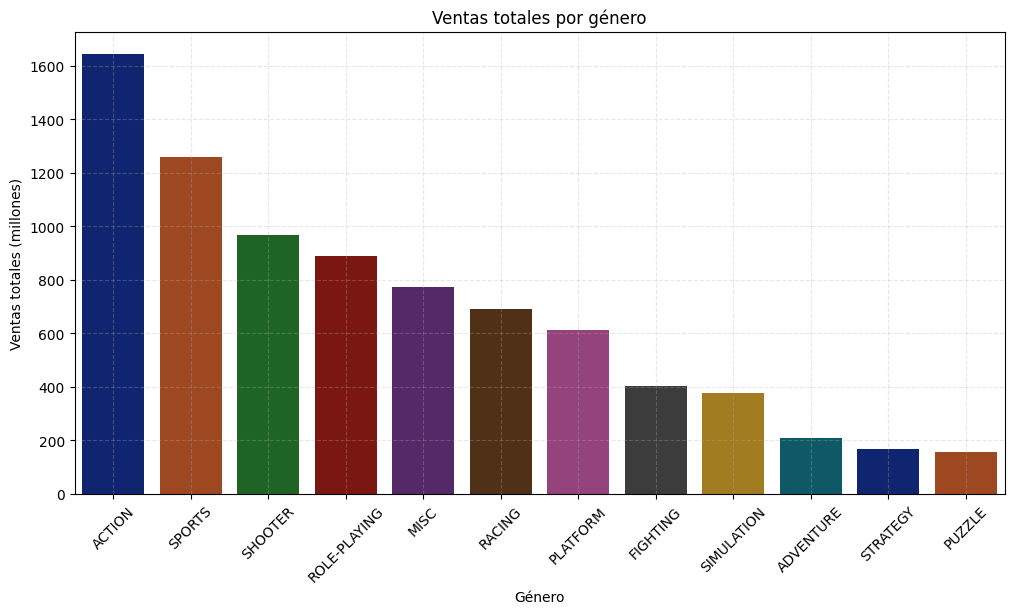

In [29]:
#Graficamos las ventas totales por genero.
plt.figure(figsize=(12, 6))
sns.barplot(data=genre_sales, x='GENRE', y='TOTAL_SALES', palette='dark')
plt.title('Ventas totales por género')
plt.xlabel('Género')
plt.ylabel('Ventas totales (millones)')
plt.xticks(rotation=45)
plt.grid(alpha=0.3, linestyle='--')
plt.show()


Aqui podemos ver que definitivamente, vemos unas grandes diferencias entre los generos y sus ventas totales, vemos ue los juegos de action tienen muchisimo mas ventas que cualquiera, justo despues vienen los deportes y los shooters. En los ultimos lugares podemos ver los que son mas complicados como los juegos de strategia y puzzle.

,GENRE,TOTAL_SALES,GAME_COUNT
0,ACTION,1645.09,3223
10,SPORTS,1258.33,1280
8,SHOOTER,967.94,792
7,ROLE-PLAYING,888.47,1701
3,MISC,773.67,808
6,RACING,692.41,533
4,PLATFORM,611.83,1203
2,FIGHTING,402.57,1434
9,SIMULATION,379.12,1247
1,ADVENTURE,210.25,842


/var/folders/52/1m6xdwc12jq950g_76bq1l140000gn/T/ipykernel_10596/199779783.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=genre_sales, x='GENRE', y='TOTAL_SALES', palette='dark')


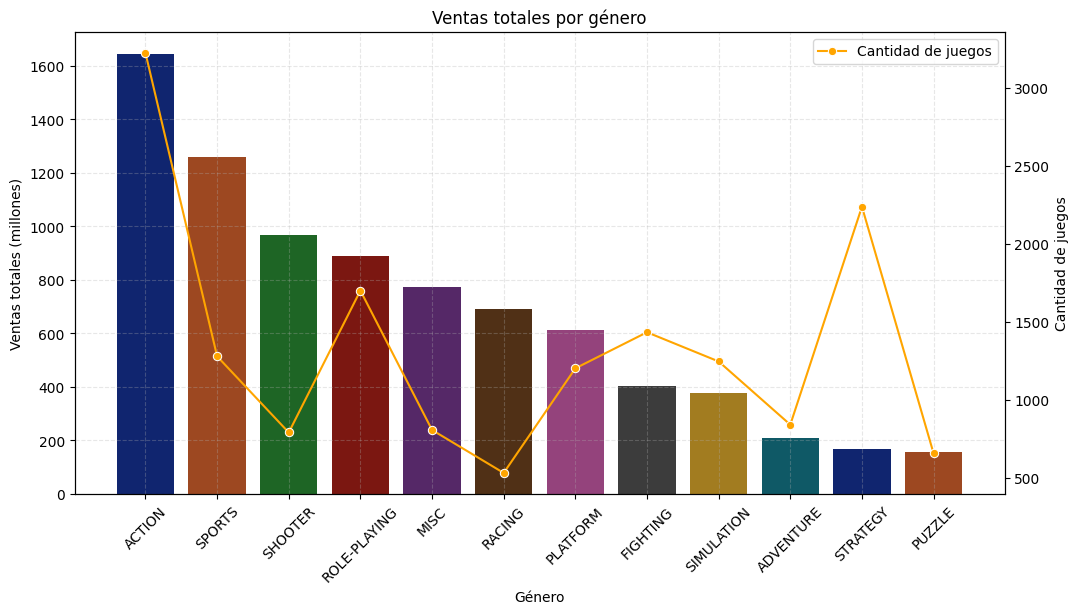

In [30]:
#Agregamos una columna de cantidad de juegos por genero.
genre_sales['GAME_COUNT'] = games_df_1995.groupby('GENRE')['NAME'].count().values
#Mostramos el dataframe con la cantidad de juegos por genero.
display(genre_sales)
#Graficamos las ventas totales por genero y la cantidad de juegos por genero.
plt.figure(figsize=(12, 6))
sns.barplot(data=genre_sales, x='GENRE', y='TOTAL_SALES', palette='dark')
plt.title('Ventas totales por género')
plt.xlabel('Género')
plt.ylabel('Ventas totales (millones)')
plt.xticks(rotation=45)
plt.grid(alpha=0.3, linestyle='--')
plt.twinx()
sns.lineplot(data=genre_sales, x='GENRE', y='GAME_COUNT', color='orange', marker='o', label='Cantidad de juegos')
plt.ylabel('Cantidad de juegos')
plt.legend()
plt.show()


In [31]:
#Calculamos la correlación entre la cantidad de juegos por género y las ventas totales.
genre_sales_corr = genre_sales['GAME_COUNT'].corr(genre_sales['TOTAL_SALES'])
print(f'Correlación entre cantidad de juegos por género y ventas totales: {genre_sales_corr:.2f}')


Correlación entre cantidad de juegos por género y ventas totales: 0.46


Vemos que no necesariamente hay una correlacion entre la cantidad de juegos que hay por genero y sus ventas totales, si hay cierta correlacion pero no es tan fuerte como pense que seria. Vemos que por ejemplo, hay mas de 2000 juegos de strategia sin embargo es de los que menos exito tiene. En juegos de racing es donde menos juegos hay y sin embargo es los que medianamente exitosos son.


### Paso 4: Crear un perfil de usuario para cada region.

Para cada región (NA, UE, JP) determina:

Las cinco plataformas principales. Describe las variaciones en sus cuotas de mercado de una región a otra.

Los cinco géneros principales. Explica la diferencia.

Si las clasificaciones de ESRB afectan a las ventas en regiones individuales.

In [32]:
#Vamos a revisar la region de NA sus 5 plataformas principales.
na_platform_sales = games_df_1995.groupby('PLATFORM')['NA_SALES'].sum().reset_index().sort_values(by='NA_SALES', ascending=False)
display(na_platform_sales.head(5))
#Vamos a revisar la region de EU sus 5 plataformas principales.
eu_platform_sales = games_df_1995.groupby('PLATFORM')['EU_SALES'].sum().reset_index().sort_values(by='EU_SALES', ascending=False)
display(eu_platform_sales.head(5))
#Vamos a revisar la region de JP sus 5 plataformas principales.
jp_platform_sales = games_df_1995.groupby('PLATFORM')['JP_SALES'].sum().reset_index().sort_values(by='JP_SALES', ascending=False)
display(jp_platform_sales.head(5))

,PLATFORM,NA_SALES
23,X360,595.74
12,PS2,572.92
20,WII,486.87
13,PS3,390.13
3,DS,380.31


,PLATFORM,EU_SALES
12,PS2,332.63
13,PS3,327.21
23,X360,268.32
20,WII,258.32
11,PS,211.19


,PLATFORM,JP_SALES
3,DS,175.02
12,PS2,137.54
11,PS,137.11
1,3DS,100.62
13,PS3,79.41


Vemos que en ventas, en NA tenemos a la X360 junto con la PS2 en primeros lugares, luego luego tenemos a la wii, finalmente siguiendo la ps3 y el DS.
Para EU tenemos la PS2 Y PS3 en primeros lugares, siguiendole la X360 y luego el WII y el PS1.
Finalmente para JP tenemos como primer lugar el DS, siguiendolos la PS2 y la PS1 para seguir con el 3DS y finalmente la PS3.

Vemos definitivamente que en NA hay muchas mas ventas promedialmente que en EU y ellos mucho mas que JP, es decir que si hay diferencias en consumo de videojuegos por region.

Tambien vemos que en NA y EU si se comparten las mismas consolas en los primeros lugares, es decir el X360, PS2,PS3 y WII. Pero en JP al parecer quitamos el X360 y nos quedamos con las playstation y sus plataformas insignia de esa region, el DS Y 3DS.

In [33]:
#Ahora revisaremos los 5 generos de juegos mas vendidos en cada region.
#Vamos a revisar la region de NA sus 5 generos principales.
na_genre_sales = games_df_1995.groupby('GENRE')['NA_SALES'].sum().reset_index().sort_values(by='NA_SALES', ascending=False)
display(na_genre_sales.head(5))
#Vamos a revisar la region de EU sus 5 generos principales.
eu_genre_sales = games_df_1995.groupby('GENRE')['EU_SALES'].sum().reset_index().sort_values(by='EU_SALES', ascending=False)
display(eu_genre_sales.head(5))
#Vamos a revisar la region de JP sus 5 generos principales.
jp_genre_sales = games_df_1995.groupby('GENRE')['JP_SALES'].sum().reset_index().sort_values(by='JP_SALES', ascending=False)
display(jp_genre_sales.head(5))


,GENRE,NA_SALES
0,ACTION,814.11
10,SPORTS,655.07
8,SHOOTER,527.59
3,MISC,392.43
6,RACING,342.82


,GENRE,EU_SALES
0,ACTION,503.35
10,SPORTS,367.35
8,SHOOTER,308.23
6,RACING,230.32
3,MISC,208.88


,GENRE,JP_SALES
7,ROLE-PLAYING,315.17
0,ACTION,146.48
10,SPORTS,104.31
3,MISC,99.51
4,PLATFORM,77.05


Nuevamente vemos grandes similitudes entre NA Y EU, teniendo en este caso las mismas top 5 generos de videojueogs en la lista, vemos nuevamente mayor cantidad de ventas en NA que en EU. Y nuevamente vemos que en JP tenemos dos diferencias, en el primer lugar tenemos el genero de ROLE-PLAYING y en 5 tenemos los juegos de PLATFORM, generos de juegos que no estan tan populares en otras regiones.


In [34]:
#Buscaremos si hay correlacion entre las rese'as ESRB y las ventas en regiones individuales.
#Vamos a revisar la region de NA sus 5 reseñas ESRB principales.
na_rating_sales = games_df_1995.groupby('RATING')['NA_SALES'].sum().reset_index().sort_values(by='NA_SALES', ascending=False)
display(na_rating_sales.head(5))
#Vamos a revisar la region de EU sus 5 reseñas ESRB principales.
eu_rating_sales = games_df_1995.groupby('RATING')['EU_SALES'].sum().reset_index().sort_values(by='EU_SALES', ascending=False)
display(eu_rating_sales.head(5))
#Vamos a revisar la region de JP sus 5 reseñas ESRB principales.
jp_rating_sales = games_df_1995.groupby('RATING')['JP_SALES'].sum().reset_index().sort_values(by='JP_SALES', ascending=False)
display(jp_rating_sales.head(5))


,RATING,NA_SALES
1,E,1274.24
7,T,747.19
5,M,742.87
2,E10+,345.50
4,K-A,2.56


,RATING,EU_SALES
1,E,703.87
5,M,480.00
7,T,420.73
2,E10+,183.33
0,AO,0.61


,RATING,JP_SALES
1,E,197.96
7,T,150.17
5,M,63.58
2,E10+,40.20
4,K-A,1.46


Finalmente, vemos que no hay mucha diferencia en este ambito. Vemos que para las 3 regiones, los 3 rating de juegos mas usados son los E, M y T.

Tambien tenemos en 4 lugar para las 4 regiones el E10+. Solo teniendo un pequeño cambio en la quinta posicion. Sin embargo esto nos muestra que no hay ninguna afectacion por el rating, en realidad, esto nos muestra simplemente que los juegos E son los mas consumidos a nivel mundial. Y que los de calificacion M y T estan muy igualados en cada region.

### Probaremos las siguientes hipotesis.

Paso 5. Prueba las siguientes hipótesis:

— Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son las mismas.

— Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes.

Establece tu mismo el valor de umbral alfa.

Explica:

— Cómo formulaste las hipótesis nula y alternativa.

— Qué criterio utilizaste para probar las hipótesis y por qué.

In [35]:
#Empezaremos por la primera hipotesis.
#Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son las mismas. Esta es la hipoteis nula.
#Vamos a revisar las calificaciones promedio de los usuarios para las plataformas Xbox One y PC.
xbox_one_df=games_df_1995[games_df_1995['PLATFORM'] == 'XONE']
pc_df=games_df_1995[games_df_1995['PLATFORM'] == 'PC']
#Vamos a hacer merge entre estas dos, solo los juegos que esten en ambas plataformas.
xbox_pc_df = pd.merge(xbox_one_df, pc_df, on='NAME', suffixes=('_XONE', '_PC'))
#mostramos el df
#display(xbox_pc_df)
#Vemos que solo hay 108 juegos que estan en ambas plataformas. Esto nos ayudara a comparar las calificaciones de los usuarios en ambas plataformas.
#Ahora vamos a tomar solo las columnas de USER_SCORE_XONE y USER_SCORE_PC y NAME.
xbox_pc_df = xbox_pc_df[['NAME', 'USER_SCORE_XONE', 'USER_SCORE_PC']]
#Quitamos las filas que tengan valores nulos en USER_SCORE_XONE o USER_SCORE_PC.
xbox_pc_df = xbox_pc_df.dropna(subset=['USER_SCORE_XONE', 'USER_SCORE_PC'])
#Volvemos a revisar la informacion del dataframe.
#display(xbox_pc_df.info())
#Ahora con estos datos, vamos a hacer una prueba de hipotesis.
#Hipotesis nula: Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son las mismas.
#Hipotesis alternativa: Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son diferentes.
#Calculamos las medias de las calificaciones de los usuarios para ambas plataformas.
mean_xbox = xbox_pc_df['USER_SCORE_XONE'].mean()
mean_pc = xbox_pc_df['USER_SCORE_PC'].mean()

print(f'Media de calificaciones de usuarios en Xbox One: {mean_xbox:.2f}'
      f'\nMedia de calificaciones de usuarios en PC: {mean_pc:.2f}')

alpha = 0.05  # Nivel de significancia
results=st.ttest_ind(xbox_pc_df['USER_SCORE_XONE'], xbox_pc_df['USER_SCORE_PC'], equal_var=False)

print('valor p:', results.pvalue)
if results.pvalue < alpha:
    print('Rechazamos la hipótesis nula. Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son diferentes.')
else:
    print('No rechazamos la hipótesis nula. Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son las mismas.')

Media de calificaciones de usuarios en Xbox One: 67.19
Media de calificaciones de usuarios en PC: 61.66
valor p: 0.021527481200754615
Rechazamos la hipótesis nula. Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son diferentes.


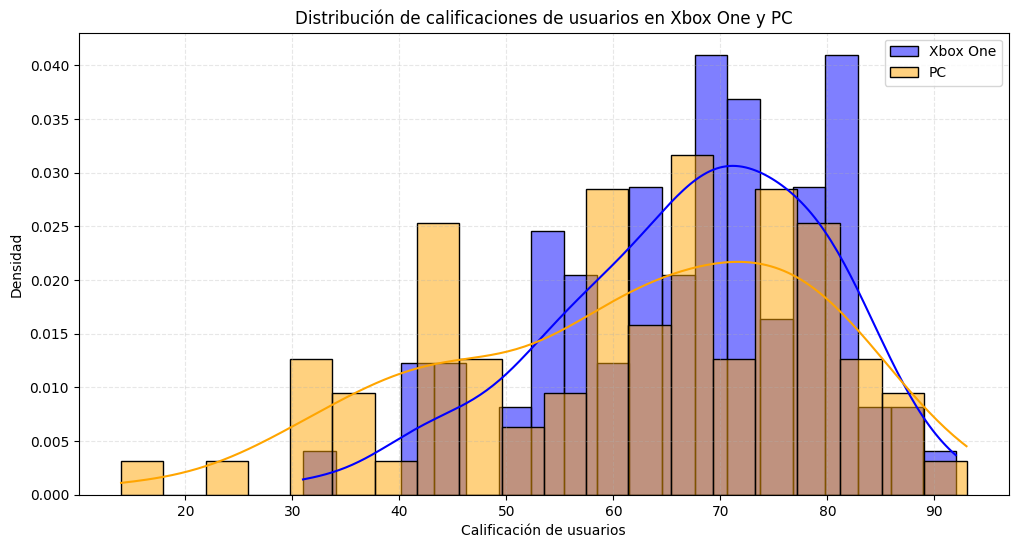

In [36]:
#lo mostramos en un histograma
plt.figure(figsize=(12, 6))
sns.histplot(xbox_pc_df['USER_SCORE_XONE'], color='blue', label='Xbox One', kde=True, stat='density', bins=20, alpha=0.5)
sns.histplot(xbox_pc_df['USER_SCORE_PC'], color='orange', label='PC', kde=True, stat='density', bins=20, alpha=0.5)
plt.title('Distribución de calificaciones de usuarios en Xbox One y PC')
plt.xlabel('Calificación de usuarios')
plt.ylabel('Densidad')
plt.legend()
plt.grid(alpha=0.3, linestyle='--')
plt.show()

Rechazamos la hipotesis nula de que las calificaciones de los usuarios es la misma para los juegos en Xbox One y PC. Esto ya que las medias y la densidad de las graficas son lo suficientemente diferentes como para poder considerarse iguales.

Vemos que en definitiva, los juegos en Xbox One, son mejores calificados por los usuarios que en PC, esto indicando que la Xbox One es o fue una mejor consola o plataforma que el PC.



Media de calificaciones de usuarios en Acción: 70.58
Media de calificaciones de usuarios en Deportes: 69.51
valor p: 0.07370217419278913
No rechazamos la hipótesis nula. Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son las mismas.


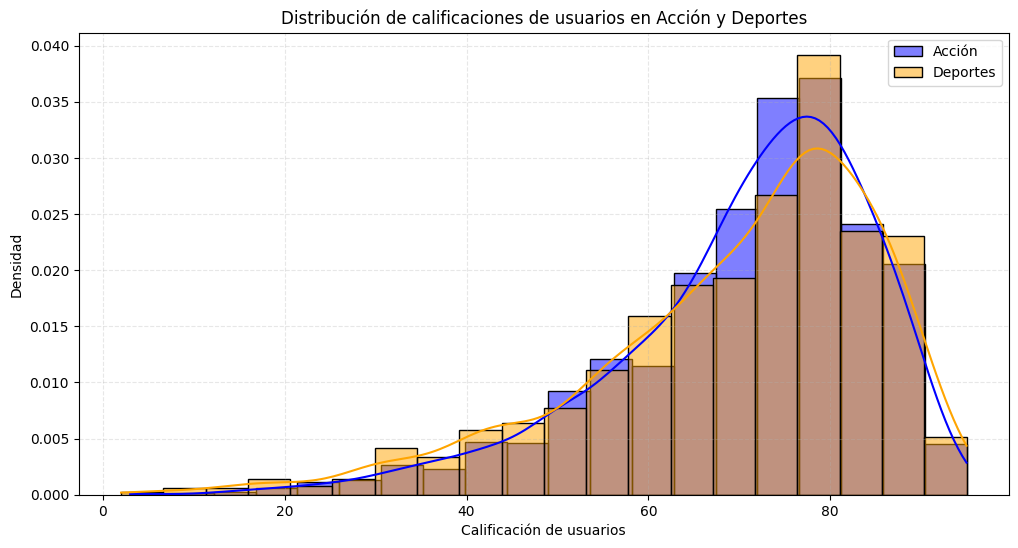

In [37]:
#hipotesis nula: Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son las mismas.
#hipotesis alternativa: Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes.
action_sports_df=games_df_1995[games_df_1995['GENRE'].isin(['ACTION', 'SPORTS'])]
#action_sports_df
#Vamos a tomar nomas las columnas de USER_SCORE y GENRE.
action_sports_df = action_sports_df[['NAME', 'USER_SCORE', 'GENRE']]
#action_sports_df
##Quitamos las filas que tengan valores nulos en USER_SCORE o GENRE.
action_sports_df = action_sports_df.dropna(subset=['USER_SCORE', 'GENRE'])




#Para revisar la hipotesis, vamos a hacer la prueba de hipotesis que hicimos antes.
#Calculamos las medias de las calificaciones de los usuarios para ambos generos.
mean_action = action_sports_df[action_sports_df['GENRE'] == 'ACTION']['USER_SCORE'].mean()
mean_sports = action_sports_df[action_sports_df['GENRE'] == 'SPORTS']['USER_SCORE'].mean()
print(f'Media de calificaciones de usuarios en Acción: {mean_action:.2f}'
      f'\nMedia de calificaciones de usuarios en Deportes: {mean_sports:.2f}')
alpha = 0.05  # Nivel de significancia
results=st.ttest_ind(action_sports_df[action_sports_df['GENRE'] == 'ACTION']['USER_SCORE'],
                     action_sports_df[action_sports_df['GENRE'] == 'SPORTS']['USER_SCORE'], equal_var=False)
print('valor p:', results.pvalue)
if results.pvalue < alpha:
    print('Rechazamos la hipótesis nula. Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes.')
else:
    print('No rechazamos la hipótesis nula. Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son las mismas.')
#lo mostramos en un histograma
plt.figure(figsize=(12, 6))
sns.histplot(action_sports_df[action_sports_df['GENRE'] == 'ACTION']['USER_SCORE'], color='blue', label='Acción', kde=True, stat='density', bins=20, alpha=0.5)
sns.histplot(action_sports_df[action_sports_df['GENRE'] == 'SPORTS']['USER_SCORE'], color='orange', label='Deportes', kde=True, stat='density', bins=20, alpha=0.5)
plt.title('Distribución de calificaciones de usuarios en Acción y Deportes')
plt.xlabel('Calificación de usuarios')
plt.ylabel('Densidad')
plt.legend()
plt.grid(alpha=0.3, linestyle='--')
plt.show()



En este caso, podemos ver definitivamente que en este caso las medias si son muy iguales, vemos que los dos histograms estan sesgados a la izquierda, es decir que la dsitribucion esta movida hacia la derecha, vemos que las medias de ambos generos estan muy cercanos el uno al otro. Esto nos da que sando la prueba de la hipotesis de medias iguales en poblaciones independientes, que no rechazemos la hipotesis nula: Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son las mismas.

En este caso escogimos de esta forma la hipotesis, para hacer la prueba que utilizamos, y comparar de esta manera las dos medias de los gneros.

### CONCLUSIONES

En conclusiones podemos ver varias cosas distintas. Algunas de estas son:
    
    La cantidad de juegos y sus cantidades de ventas empezaron a ser mas importantes y significativas a partir de 1995.

    Las nuevas consolas tardan aproximadamente un poco menos de una decada en sacar una nueva y tardan una decada aproximadamente en dejar de generar ganancias.

    Las ventas totales entre el X360 y la PS3 son muy similares y podriamos decir que tiene una gran cantidad de correlacion entre ellas.

    Vemos que la calificacion profesional esta mucho mas relacionado con las ventas que el del usuario. Como que los usuarios suelen calificar de manera mas contundente o emocional.

    Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son diferentes.

    Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son las mismas.

Estas conclusiones nos indican mucha informacion, ademas tambien podriamos revisar muchas mas cosas al respecto, claro que quiza en un trabajo mas real, nos tomaria mucho mas tiempo revisar todos los datos y todas las correlaciones posibles, incluso por generos, o incluso por plataformas.

Tambien podemos ver que en el sig año del 2017 tendremos a la plataforma del PS4 teniendo su mayoria de ventas, o incluso el Xbox One podria empezar a repuntar. Ya que hemos visto que son los mayores competidores de juegos entre ellos.

Vemos tambien que en Japon hay mucha diferencia entre EU y NA en el tipo de juegos que juegan o las plataformas que escogieron para jugar. Fuera de la PlayStation que tiene mas tiempo que el Xbox, en Japon preferian utilizar su nintendo DS o el 3DS como mayores plataformas de videojuegos y ventas.

Este trabajo fue bastante interesante y demandante, cada vez puedo pensar en mas y mas opciones de como responder distintas preguntas, y empiezan a surgir preguntas mias a cerca de los datos que estarian interesantes revisar.

Tambien trato de mejorar ciertos aspectos en las graficas y reviso en internet o en la IA como realizarlo y puedo ver mas formas de graficar de maneras mas intuitivas que no sabia. Esto se esta volviendo cada vez mas interesante con las distintas formas de programar y de mostar los resultados.
